In [6]:
# from google.colab import drive
# drive.mount('/content/drive')
# file_path = '/content/drive/MyDrive/DATA_PIS3/21_10/21_10/Andrea/Andrea_lee.acq.txt'
file_path = 'DATA/21_10/Andrea/Andrea_lee.acq.txt'

In [7]:
# --------------- Lectura y detección de encabezado ---------------
import pandas as pd

# Leemos de forma segura (latin-1) las primeras N líneas para detectar la estructura
with open(file_path, 'r', encoding='latin-1', errors='replace') as f:
    preview_lines = [next(f) for _ in range(200)]  # toma hasta 200 líneas de vista previa 

# Buscamos la línea que contiene los nombres de columna (en tu ejemplo empieza con "min\tCH1\t...")
header_idx = None
for i, ln in enumerate(preview_lines):
    if ln.strip().startswith('min') or ln.strip().startswith('time') or ln.strip().lower().startswith('time'):
        header_idx = i
        break

# Leemos la línea del encabezado para tomar los nombres
with open(file_path, 'r', encoding='latin-1', errors='replace') as f:
    for _ in range(header_idx):
        next(f)
    header_line = next(f).strip()

col_names = header_line.split()  # split por whitespace (tabs)

# Ahora detectamos si la siguiente línea es la de 'samples' (tiene la palabra 'samples')
with open(file_path, 'r', encoding='latin-1', errors='replace') as f:
    for _ in range(header_idx + 1):
        next(f)
    second_line = next(f).strip()
# Si la segunda línea contiene 'samples', la marcamos para que pandas la salte
skiprows = None
if 'samples' in second_line.lower():
    skiprows = list(range(header_idx + 1, header_idx + 2))

# --------------- Cargar con pandas ---------------
df = pd.read_csv(    file_path,    sep='\t',    header=header_idx,
    skiprows=skiprows,    encoding='latin-1',    engine='python'
)
# Si pandas no separó correctamente (p. ej. columnas juntas), intentamos con delim_whitespace=True
if df.shape[1] == 1:
    df = pd.read_csv(        file_path,        delim_whitespace=True,
        header=header_idx,        skiprows=skiprows,        encoding='latin-1',        engine='python'
    )


# Eliminar columnas completamente vacías
df = df.dropna(axis=1, how='all')

if 'min' in df.columns:
    df = df.rename(columns={'min':'time'})

# Convertir todas las columnas numéricas a float (ignora errores)
for c in df.columns:
    # preserva columnas no numéricas si las hubiera
    try:
        df[c] = pd.to_numeric(df[c].astype(str).str.replace(',', '.'), errors='coerce')
    except Exception:
        pass
# Renombrar columnas según correspondencia
df.rename(columns={
    'CH1': 'SpO2',    'CH3': 'RSP',    'CH5': 'PPG',    'CH9': 'Rate',
    'CH13': 'Status',    'CH14': 'EDA',    'CH15': 'ECG'
}, inplace=True)

# Mostrar resumen
print("Ruta:", file_path)
print("Encabezado detectado en la línea:", header_idx)
print("Primeras columnas:", list(df.columns[:10]))
print("Tamaño del DataFrame:", df.shape)
display(df.head())



Ruta: DATA/21_10/Andrea/Andrea_lee.acq.txt
Encabezado detectado en la línea: 19
Primeras columnas: ['time', 'SpO2', 'RSP', 'PPG', 'Rate', 'Status', 'EDA', 'ECG']
Tamaño del DataFrame: (882781, 8)


,time,SpO2,RSP,PPG,Rate,Status,EDA,ECG
0,0.000000,93.1636,-10.0,-0.575256,105.347,15.9995,-0.003053,-0.071411
1,0.000008,93.1597,-10.0,-0.570374,105.316,15.9995,-0.000001,-0.073700
2,0.000017,93.1675,-10.0,-0.564270,105.347,15.9995,-0.000001,-0.076447
3,0.000025,93.1597,-10.0,-0.559082,105.347,15.9995,-0.001527,-0.077515
4,0.000033,93.1636,-10.0,-0.553894,105.332,15.9995,-0.001527,-0.079193


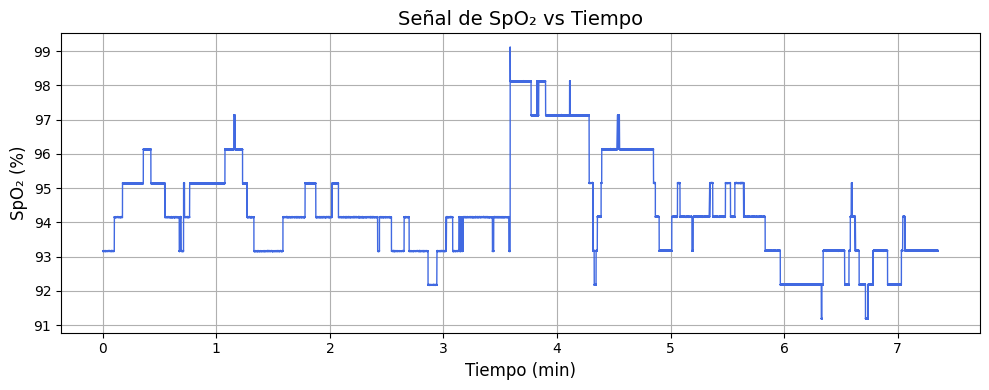

In [8]:
#Gráfica SpO2

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(df['time'], df['SpO2'], color='royalblue', linewidth=1)
plt.title('Señal de SpO₂ vs Tiempo', fontsize=14)
plt.xlabel('Tiempo (min)', fontsize=12)
plt.ylabel('SpO₂ (%)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


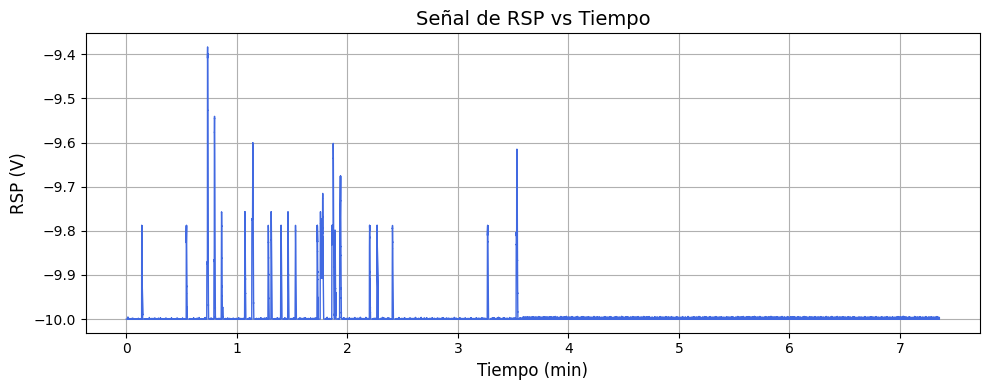

In [9]:
#Gráfica RSP

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(df['time'], df['RSP'], color='royalblue', linewidth=1)
plt.title('Señal de RSP vs Tiempo', fontsize=14)
plt.xlabel('Tiempo (min)', fontsize=12)
plt.ylabel('RSP (V)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

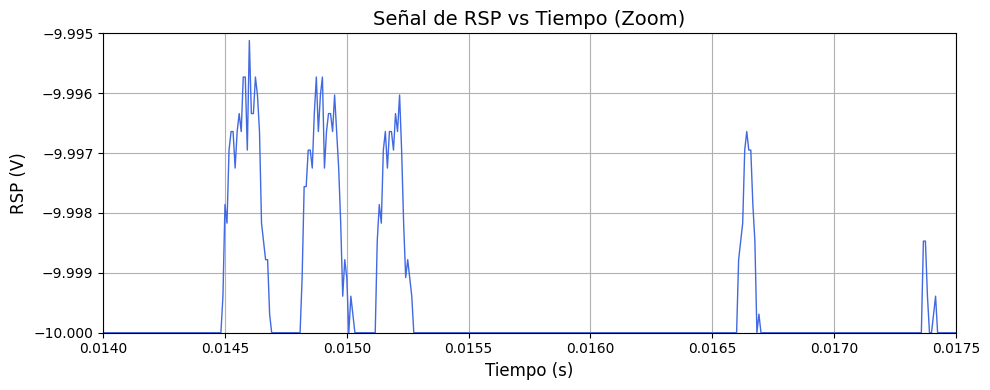

In [10]:
#Gráfica RSP aumetada
plt.figure(figsize=(10, 4))
plt.plot(df['time'], df['RSP'], color='royalblue', linewidth=1)
plt.title('Señal de RSP vs Tiempo (Zoom)', fontsize=14)
plt.xlabel('Tiempo (s)', fontsize=12)
plt.ylabel('RSP (V)', fontsize=12)
plt.xlim(0.014, 0.0175)
plt.ylim(-10, -9.9950)
plt.grid(True)
plt.tight_layout()
plt.show()


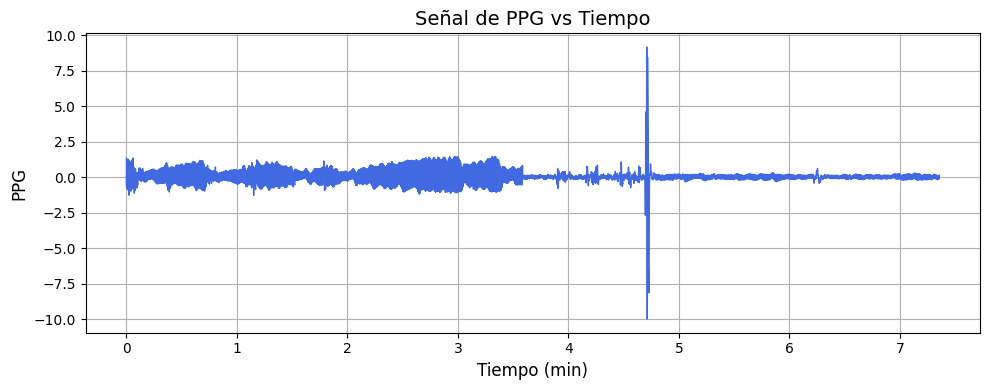

In [11]:
plt.figure(figsize=(10, 4))
plt.plot(df['time'], df['PPG'], color='royalblue', linewidth=1)
plt.title('Señal de PPG vs Tiempo', fontsize=14)
plt.xlabel('Tiempo (min)', fontsize=12)
plt.ylabel('PPG', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

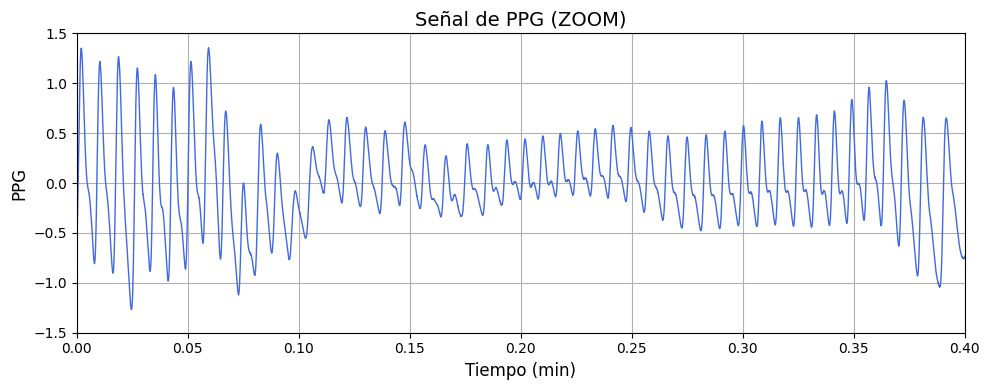

In [12]:
plt.figure(figsize=(10, 4))
plt.plot(df['time'], df['PPG'], color='royalblue', linewidth=1)
plt.title('Señal de PPG (ZOOM)', fontsize=14)
plt.xlabel('Tiempo (min)', fontsize=12)
plt.ylabel('PPG', fontsize=12)
plt.xlim(0, 0.4)
plt.ylim(-1.5, 1.5)
plt.grid(True)
plt.tight_layout()
plt.show()

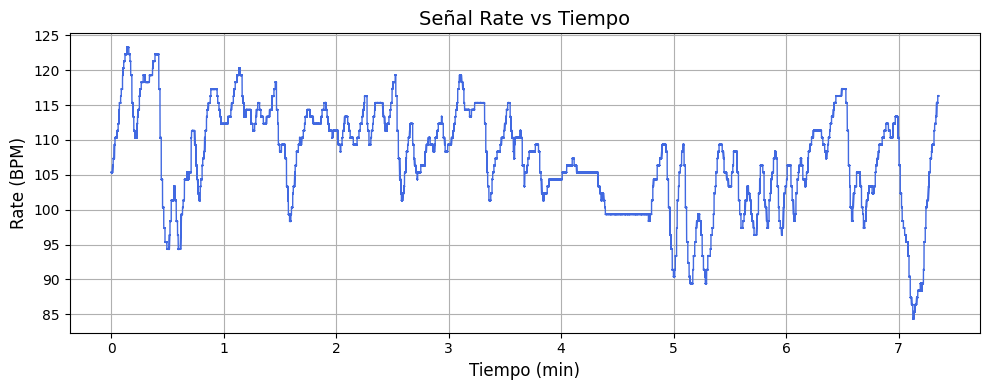

In [13]:
plt.figure(figsize=(10, 4))
plt.plot(df['time'], df['Rate'], color='royalblue', linewidth=1)
plt.title('Señal Rate vs Tiempo', fontsize=14)
plt.xlabel('Tiempo (min)', fontsize=12)
plt.ylabel('Rate (BPM)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

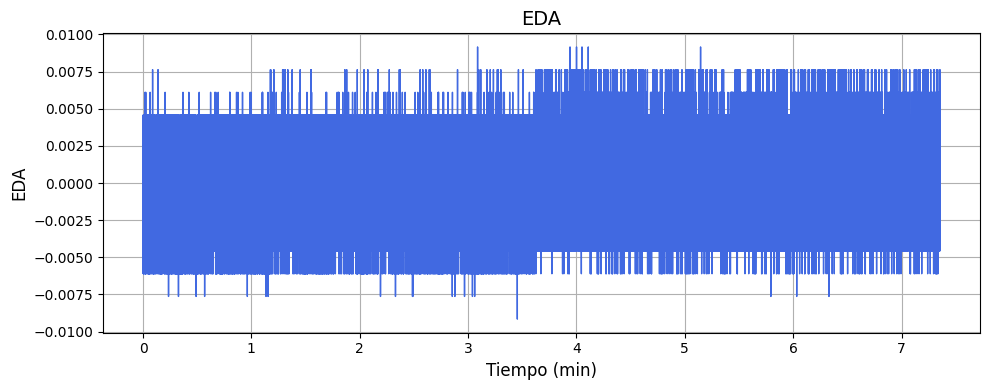

In [14]:
plt.figure(figsize=(10, 4))
plt.plot(df['time'], df['EDA'], color='royalblue', linewidth=1)
plt.title('EDA', fontsize=14)
plt.xlabel('Tiempo (min)', fontsize=12)
plt.ylabel('EDA', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

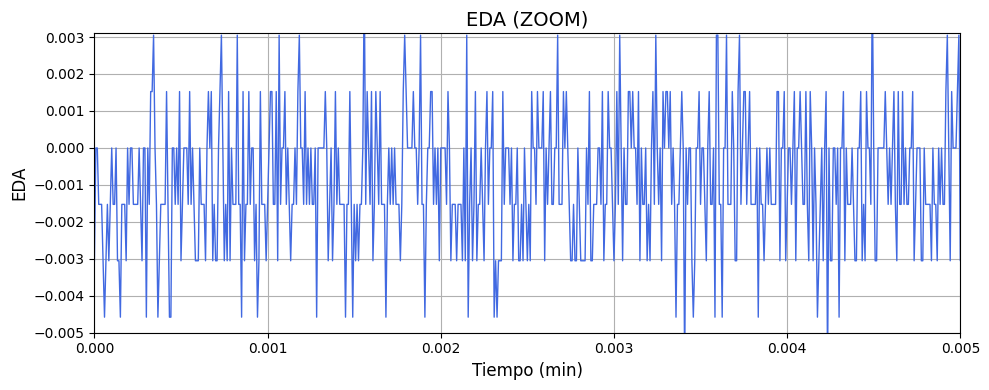

In [15]:
plt.figure(figsize=(10, 4))
plt.plot(df['time'], df['EDA'], color='royalblue', linewidth=1)
plt.title('EDA (ZOOM)', fontsize=14)
plt.xlabel('Tiempo (min)', fontsize=12)
plt.ylabel('EDA', fontsize=12)
plt.xlim(0,0.005)
plt.ylim(-0.0050,0.0031)
plt.grid(True)
plt.tight_layout()
plt.show()

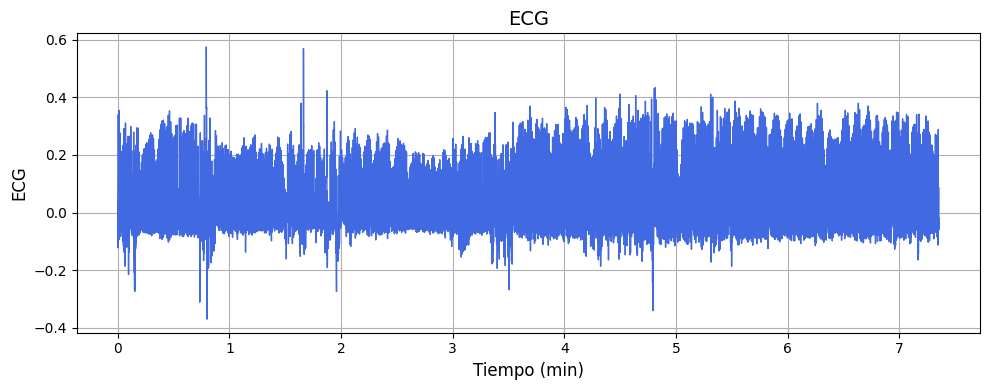

In [16]:
plt.figure(figsize=(10, 4))
plt.plot(df['time'], df['ECG'], color='royalblue', linewidth=1)
plt.title('ECG', fontsize=14)
plt.xlabel('Tiempo (min)', fontsize=12)
plt.ylabel('ECG', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

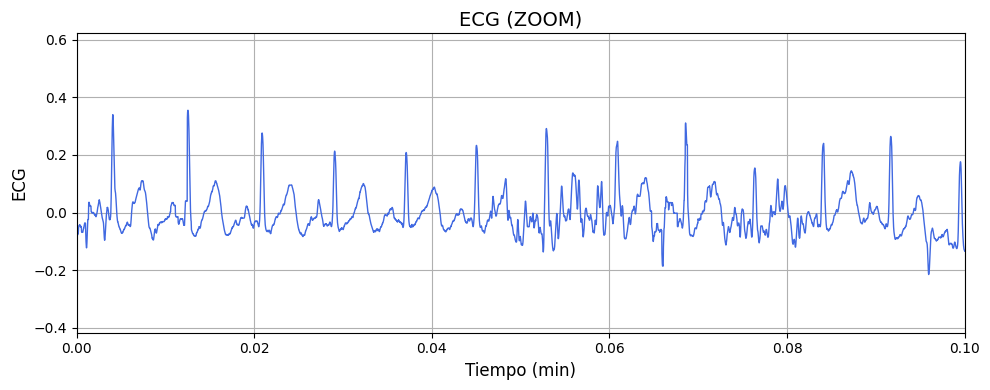

In [17]:
plt.figure(figsize=(10, 4))
plt.plot(df['time'], df['ECG'], color='royalblue', linewidth=1)
plt.title('ECG (ZOOM)', fontsize=14)
plt.xlabel('Tiempo (min)', fontsize=12)
plt.ylabel('ECG', fontsize=12)
plt.xlim(0,0.1)
#plt.ylim(-0.0050,0.0031)
plt.grid(True)
plt.tight_layout()
plt.show()